# Video Oyunu Satış ve Fiyat Analizi

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
df = df.dropna()

In [12]:
df.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [14]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
df["Genre"].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16291.0,8290.190228,4792.654450,1.00,4132.50,8292.00,12439.50,16600.00
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


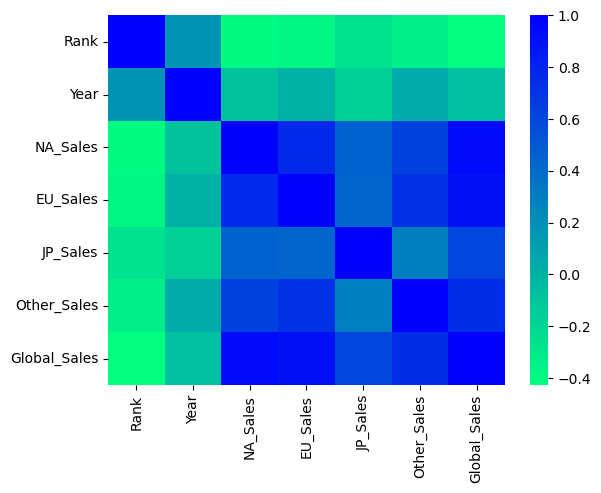

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Sadece sayısal sütunları seçtik
corr_matrix = numeric_df.corr()  
sns.heatmap(corr_matrix, cmap="winter_r")  
plt.show()

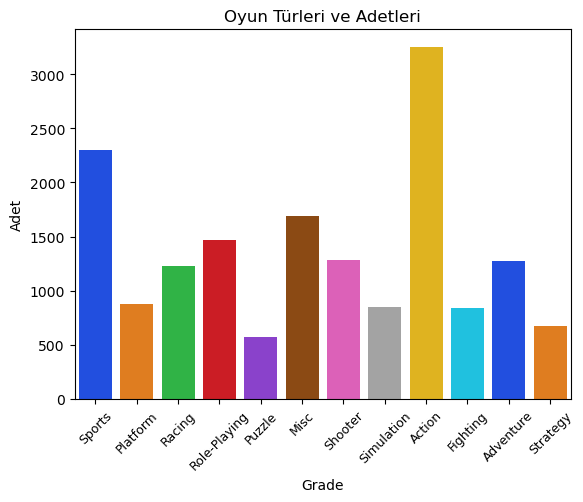

In [21]:
sns.countplot(x="Genre",data=df, palette="bright")
plt.xlabel("Grade")
plt.ylabel("Adet")
plt.xticks(fontsize=9,rotation=45)
plt.title("Oyun Türleri ve Adetleri")
plt.show()

In [22]:
year_df = df.groupby("Year").sum()
year_df = year_df[["Global_Sales"]]
year_df.tail() # yıllara göre global sales toplamları

,Global_Sales
Year,
2014.0,337.03
2015.0,264.44
2016.0,70.90
2017.0,0.05
2020.0,0.29


In [23]:
customer = df.groupby("Year").sum().sort_values("Global_Sales",ascending=False)
customer.drop(["Rank","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis=1,inplace=True) # sütun sildik
customer.head(5) #Global Sales en yüksekten en düşüğe

,Name,Platform,Genre,Publisher,Global_Sales
Year,,,,,
2008.0,Mario Kart WiiSuper Smash Bros. BrawlGrand The...,WiiWiiX360PS3DSX360X360PS3PS3PSPPS3DSX360WiiX3...,RacingFightingActionActionRole-PlayingShooterS...,NintendoNintendoTake-Two InteractiveTake-Two I...,678.90
2009.0,Wii Sports ResortNew Super Mario Bros. WiiWii ...,WiiWiiWiiX360DSPS3PCWiiPS3X360DSPS3X360PS3X360...,SportsPlatformSportsShooterActionShooterSimula...,NintendoNintendoNintendoActivisionNintendoActi...,667.30
2007.0,Wii FitHalo 3Super Mario GalaxyCall of Duty 4:...,WiiX360WiiX360DSWiiWiiPS3WiiX360DSDSWiiPS2DSPS...,SportsShooterPlatformShooterMiscMiscSportsShoo...,NintendoMicrosoft Game StudiosNintendoActivisi...,609.92
2010.0,Kinect Adventures!Pokemon Black/Pokemon WhiteC...,X360DSX360PS3PS3X360WiiWiiWiiWiiPS3WiiX360X360...,MiscRole-PlayingShooterShooterRacingShooterMis...,Microsoft Game StudiosNintendoActivisionActivi...,600.29
2006.0,Wii SportsNew Super Mario Bros.Wii PlayPokemon...,WiiDSWiiDSWiiX360PS2DSPS2PSPPS2PS2X360PS3PSPPS...,SportsPlatformMiscRole-PlayingActionShooterRol...,NintendoNintendoNintendoNintendoNintendoMicros...,521.04


In [25]:
customer.reset_index(inplace=True)
customer.head(2)

,Year,Name,Platform,Genre,Publisher,Global_Sales
0,2008.0,Mario Kart WiiSuper Smash Bros. BrawlGrand The...,WiiWiiX360PS3DSX360X360PS3PS3PSPPS3DSX360WiiX3...,RacingFightingActionActionRole-PlayingShooterS...,NintendoNintendoTake-Two InteractiveTake-Two I...,678.9
1,2009.0,Wii Sports ResortNew Super Mario Bros. WiiWii ...,WiiWiiWiiX360DSPS3PCWiiPS3X360DSPS3X360PS3X360...,SportsPlatformSportsShooterActionShooterSimula...,NintendoNintendoNintendoActivisionNintendoActi...,667.3


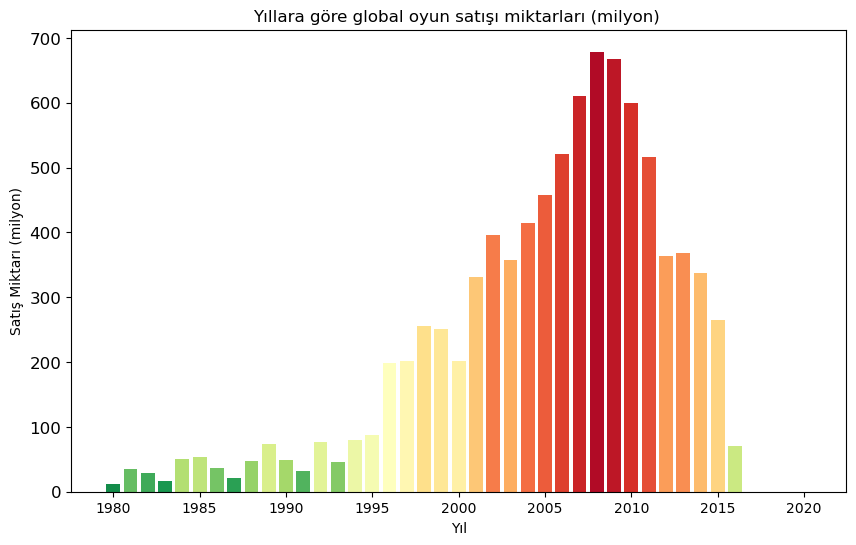

In [26]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("RdYlGn", len(df["Year"].unique()))
plt.bar(customer["Year"],customer["Global_Sales"], color=colors)
plt.title("Yıllara göre global oyun satışı miktarları (milyon) ")
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=12)
plt.xlabel("Yıl")
plt.ylabel("Satış Miktarı (milyon)")
plt.show()

In [27]:
category = df.groupby("Genre").sum().sort_values("Global_Sales",ascending=False)
category.drop(["Rank","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Year"],axis=1,inplace=True) # sütun sildik
category.head(5) #Global Sales en yüksekten en düşüğe

,Name,Platform,Publisher,Global_Sales
Genre,,,,
Action,Grand Theft Auto VGrand Theft Auto: San Andrea...,PS3PS2X360PS2PS2PS4DSX360PS3PS3PSPN64WiiPS3PS3...,Take-Two InteractiveTake-Two InteractiveTake-T...,1722.84
Sports,Wii SportsWii Sports ResortWii FitWii Fit Plus...,WiiWiiWiiWiiPS4WiiPS3WiiPS3PS4X360DSPS3PSPS2PS...,NintendoNintendoNintendoNintendoElectronic Art...,1309.24
Shooter,Duck HuntCall of Duty: Modern Warfare 3Call of...,NESX360X360PS4PS3X360X360PS3PS3X360PS3X360X360...,NintendoActivisionActivisionActivisionActivisi...,1026.20
Role-Playing,Pokemon Red/Pokemon BluePokemon Gold/Pokemon S...,GBGBDSGBADSGB3DS3DSGBAPSX360DSPS2PSDSPS4PS3GBA...,NintendoNintendoNintendoNintendoNintendoNinten...,923.83
Platform,Super Mario Bros.New Super Mario Bros.New Supe...,NESDSWiiSNESGBNESN64Wii3DSSNESDS3DSSNESWiiPSNE...,NintendoNintendoNintendoNintendoNintendoNinten...,829.13


In [30]:
category.reset_index(inplace=True)
category.head(6)

,Genre,Name,Platform,Publisher,Global_Sales
0,Action,Grand Theft Auto VGrand Theft Auto: San Andrea...,PS3PS2X360PS2PS2PS4DSX360PS3PS3PSPN64WiiPS3PS3...,Take-Two InteractiveTake-Two InteractiveTake-T...,1722.84
1,Sports,Wii SportsWii Sports ResortWii FitWii Fit Plus...,WiiWiiWiiWiiPS4WiiPS3WiiPS3PS4X360DSPS3PSPS2PS...,NintendoNintendoNintendoNintendoElectronic Art...,1309.24
2,Shooter,Duck HuntCall of Duty: Modern Warfare 3Call of...,NESX360X360PS4PS3X360X360PS3PS3X360PS3X360X360...,NintendoActivisionActivisionActivisionActivisi...,1026.20
3,Role-Playing,Pokemon Red/Pokemon BluePokemon Gold/Pokemon S...,GBGBDSGBADSGB3DS3DSGBAPSX360DSPS2PSDSPS4PS3GBA...,NintendoNintendoNintendoNintendoNintendoNinten...,923.83
4,Platform,Super Mario Bros.New Super Mario Bros.New Supe...,NESDSWiiSNESGBNESN64Wii3DSSNESDS3DSSNESWiiPSNE...,NintendoNintendoNintendoNintendoNintendoNinten...,829.13
5,Misc,Wii PlayKinect Adventures!Brain Age: Train You...,WiiX360DSWiiWiiX360DSWiiWiiWiiWiiDSPS3GBPS2PS2...,NintendoMicrosoft Game StudiosNintendoUbisoftU...,789.87


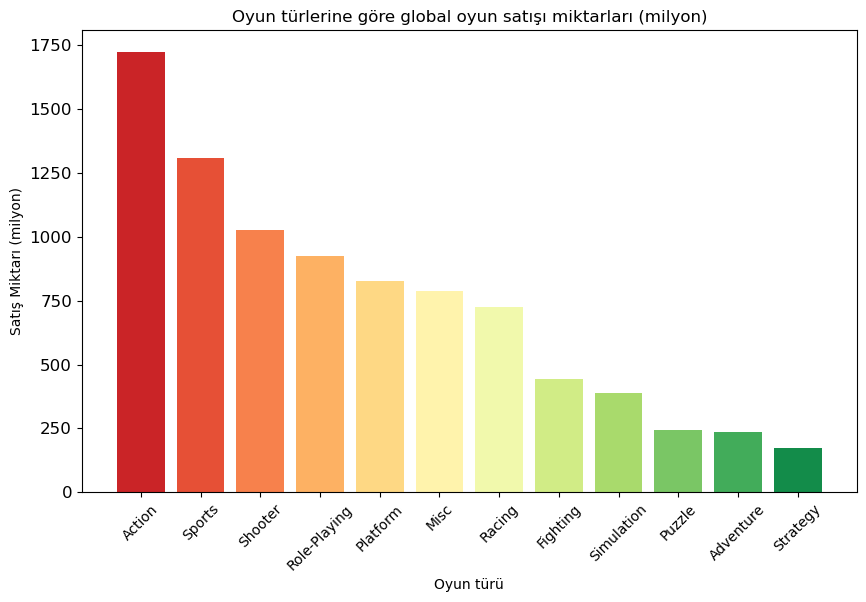

In [33]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("RdYlGn", len(df["Genre"].unique()))
plt.bar(category["Genre"],category["Global_Sales"], color=colors)
plt.title("Oyun türlerine göre global oyun satışı miktarları (milyon)")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel("Oyun türü")
plt.ylabel("Satış Miktarı (milyon)")
plt.show()

In [34]:
eu_satis = df["EU_Sales"].sum()
eu_satis
jp_satis = df["JP_Sales"].sum().round(2)
jp_satis
na_satis = df["NA_Sales"].sum().round(2)
na_satis
print("Avrupa toplam satış:", eu_satis)
print("Japonya toplam satış:", jp_satis)
print("Amerika toplam satış:", na_satis)

Avrupa toplam satış: 2406.69
Japonya toplam satış: 1284.27
Amerika toplam satış: 4327.65


In [35]:
toplam = {
     "Satislar": [eu_satis,jp_satis,na_satis],
     "Bolge": ["Avrupa","Japonya","Amerika"],
}

In [38]:
toplams = pd.DataFrame(toplam)
toplams

,Satislar,Bolge
0,2406.69,Avrupa
1,1284.27,Japonya
2,4327.65,Amerika


In [40]:
toplams.dtypes

Satislar    float64
Bolge        object
dtype: object

In [41]:
toplams.Bolge = pd.Categorical(toplams.Bolge)   #object den category'ye çevirdik 

# "category" türü, benzersiz değerleri bir kategori tablosunda saklayarak, her bir benzersiz değere bir kategori kodu atar.
#  Bu, tekrarlanan değerlerin aynı kategori kodunu paylaşması anlamına gelir ve bellek kullanımını azaltır.

In [42]:
toplams.dtypes

Satislar     float64
Bolge       category
dtype: object

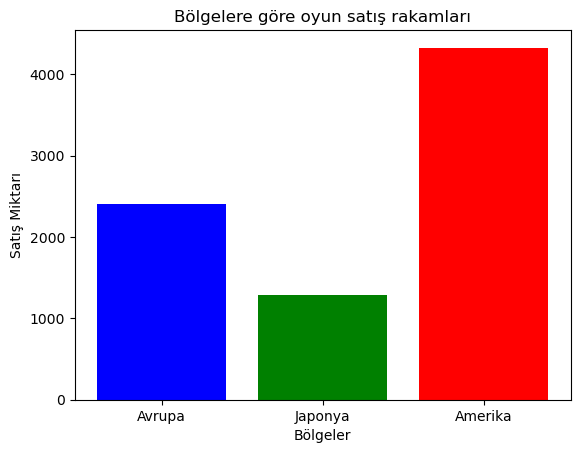

In [63]:
plt.bar(toplams["Bolge"], toplams["Satislar"],color=["Blue","Green","Red"])
plt.title("Bölgelere göre oyun satış rakamları")
plt.xlabel("Bölgeler")
plt.ylabel("Satış Miktarı")
plt.show()

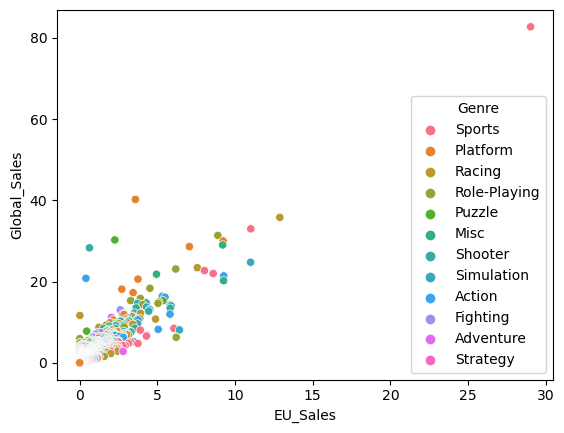

In [48]:
sns.scatterplot(x = "EU_Sales", y = "Global_Sales", hue = "Genre", data = df);

In [49]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

x = df[["Platform","Genre","Publisher"]]
y = df["Global_Sales"]

#label encoder
label_encoders = {}
for col in x.columns:
    label_encoders[col] = LabelEncoder()
    x[col] = label_encoders[col].fit_transform(x[col])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Decision Tree
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.3f}".format(mse))

ea_ps4_sports = df[(df['Publisher'] == 'Electronic Arts') & (df['Platform'] == 'PS4') & (df['Genre'] == 'Sports')]
mean_value = ea_ps4_sports['Global_Sales'].mean()
print(f"Global Satış Ortalaması: {mean_value:.3f}")

example_prediction = model.predict([[label_encoders['Platform'].transform(['PS4'])[0],
                                     label_encoders['Genre'].transform(['Sports'])[0],
                                     label_encoders['Publisher'].transform(['Electronic Arts'])[0]]])
example_prediction_value = example_prediction[0] 
print("Tahmin Fiyat: {:.3f}".format(example_prediction_value))

MSE: 3.988
Global Satış Ortalaması: 2.124
Tahmin Fiyat: 2.438


In [51]:
ea_ps4_sports = df[(df['Publisher'] == 'Electronic Arts') & (df['Platform'] == 'PS4') & (df['Genre'] == 'Sports')]
ea_ps4_sports[["Global_Sales"]]

,Global_Sales
77,8.49
124,6.59
221,4.77
418,3.22
493,2.90
836,2.03
1628,1.23
2012,1.04
2342,0.89
2529,0.82


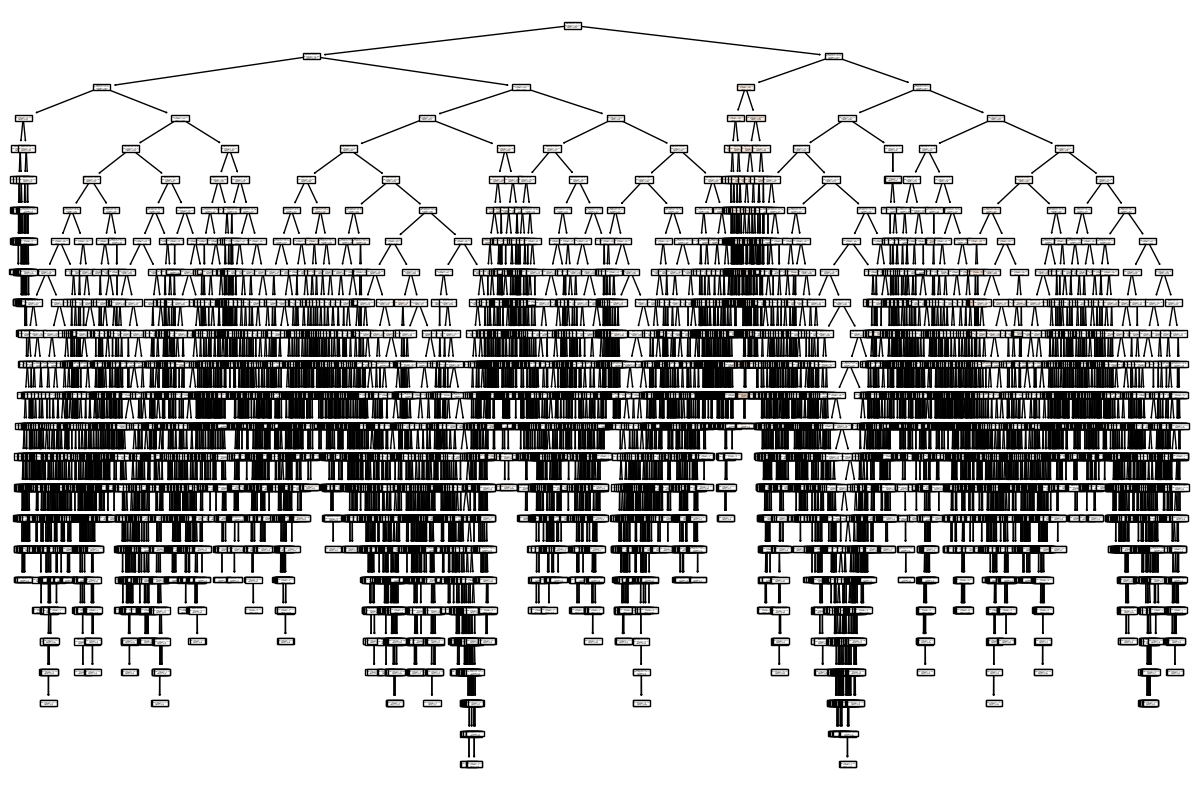

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=x.columns.tolist(), filled=True)
plt.show()